#  Linear Regression Essentials
<div style="border: 2px solid #2c3e50; 
            padding: 15px; 
            border-radius: 8px; 
            background-color: #e8f8f5; 
            color: #2c3e50; 
            font-family: 'Segoe UI', Tahoma, sans-serif; 
            box-shadow: 2px 2px 6px rgba(0,0,0,0.1);">

<h3 style="color:#117864;">Notebook Intro</h3>

<p>
This notebook introduces linear regression through a rent prediction example.  
It explains the core concepts—input shapes, model formula, and scikit-learn parameters—while walking step by step through implementation.  
As part of the series, it serves as a foundation for more advanced machine learning projects.
</p>

</div>


##  Input Shapes

### Feature Matrix (X)
- Shape: `(n_samples, n_features)`
- Example: `x = np.array(area).reshape(-1, 1)`

### Target Vector (y)
- Shape: `(n_samples,)` or `(n_samples, 1)`
- Example: `y = np.array(rent).reshape(-1, 1)`

---

##  Linear Model Formula

$$
\hat{y} = \text{intercept\_} + \text{coef\_}[0] \cdot x
$$

Where:
- $ \hat{y} $ = predicted output
- `intercept_` = model bias
- `coef_` = slope of the line

---

##  Key Parameters

| Symbol | scikit-learn     | Description              |
|--------|------------------|--------------------------|
| \( b_0 \) | `intercept_`      | Y-intercept (bias term) |
| \( b_1 \) | `coef_[0]`        | Slope (per-unit change) |
| \( x \)   | Input feature     | e.g., area              |

---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing_data_large.csv to housing_data_large.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv("housing_data_large.csv")
df.head(5)

,Area (sqft),Bedrooms,Bathrooms,Parking,Location,Rent (USD)
0,2100,4,3,3,Rural,2144
1,910,2,2,0,Urban,897
2,2163,2,2,0,Urban,1574
3,2999,3,2,0,Urban,2360
4,1474,1,4,2,Urban,1494


In [ ]:
area = df['Area (sqft)']
rent = df ['Rent (USD)']
# Filter all houses with rent > 2000
high_rent = df[df["Rent (USD)"] > 2000]
print(high_rent["Rent (USD)"].mean())

2333.52


In [ ]:
x = np.array(area).reshape(-1,1)
y = np.array(rent)

print(x,y)

[[2100]
 [ 910]
 [2163]
 [2999]
 [1474]
 [2159]
 [ 971]
 [2534]
 [1180]
 [2988]
 [1786]
 [3461]
 [2629]
 [3377]
 [ 984]
 [2285]
 [1488]
 [1880]
 [ 953]
 [3146]
 [2771]
 [2201]
 [1670]
 [3239]
 [2867]
 [1907]
 [2810]
 [2134]
 [1368]
 [2211]
 [2472]
 [3073]
 [ 869]
 [3344]
 [3491]
 [2243]
 [2980]
 [2949]
 [1868]
 [3013]
 [2686]
 [3212]
 [2665]
 [1774]
 [2906]
 [3062]
 [1504]
 [2644]
 [1266]
 [2789]] [2144  897 1574 2360 1494 1831 1286 1959 1546 2057 1729 2853 2041 2513
  958 1887 1392 1419  652 2685 2073 1820 1730 2453 2136 1881 2260 2060
  925 1793 2111 2261 1112 2491 2231 1728 2628 2237 1672 2712 2096 2444
 2335 1657 2512 2505 1547 2140 1288 1915]


In [ ]:
import matplotlib.pyplot as plt



Slope (coefficient): 0.6190317188191818
Intercept: 491.1938580746271


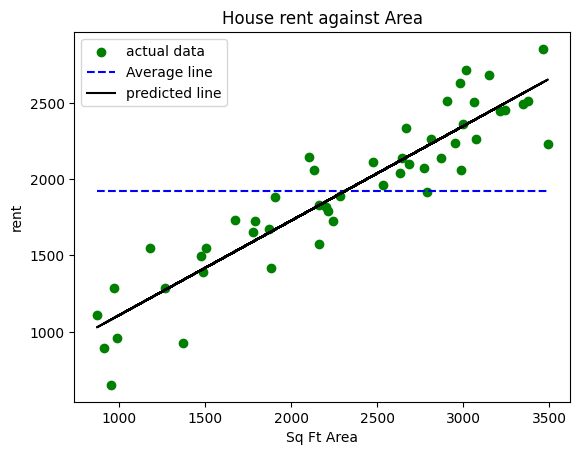

In [ ]:
model = LinearRegression()
model.fit(x,y)
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

plt.scatter(x,y, color='green', label='actual data')
plt.hlines(np.mean(y), xmin=min(x), xmax=max(x), colors='blue', linestyles='dashed', label='Average line')
plt.plot(x,model.predict(x),color='black', label="predicted line")
plt.title("House rent against Area")
plt.xlabel("Sq Ft Area")
plt.ylabel("rent")
plt.legend()
plt.show()


In [ ]:
#making predictions
model.predict([[2701],[900]])

array([2163.19853061, 1048.32240501])

** Error of each feature**
$$ ϵ= y_{actual} - y_{predicted}  $$

[2100] 2144 1791.160467594909
[910] 897 1054.5127222000824
[2163] 1574 1830.1594658805175
[2999] 2360 2347.6699828133533
[1474] 1494 1403.6466116141012
[2159] 1831 1827.6833390052407
[971] 1286 1092.2736570480527
[2534] 1959 2059.8202335624337
[1180] 1546 1221.6512862812615
[2988] 2057 2340.8606339063426
[1786] 1729 1596.7845078856858
[3461] 2853 2633.662636907816
[2629] 2041 2118.628246850256
[3377] 2513 2581.6639725270043
[984] 958 1100.3210693927022
[2285] 1887 1905.6813355764575
[1488] 1392 1412.3130556775695
[1880] 1419 1654.973489454689
[953] 652 1081.1310861093075
[3146] 2685 2438.6676454797735
[2771] 2073 2206.53075092258
[2201] 1820 1853.6826711956464
[1670] 1730 1524.9768285026607
[3239] 2453 2496.237595329957
[2867] 2136 2265.9577959292214
[1907] 1881 1671.6873458628068
[2810] 2260 2230.6729879565282
[2134] 2060 1812.2075460347612
[1368] 925 1338.029249419268
[2211] 1793 1859.8729883838382
[2472] 2111 2021.4402669956446
[3073] 2261 2393.4783300059726
[869] 1112 1029.13242172

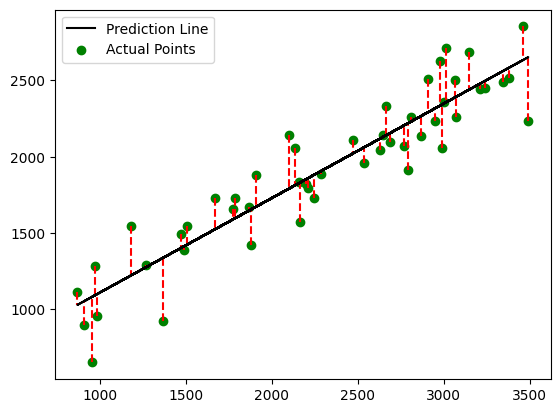

In [ ]:
x_full = np.linspace(x.min(),x.max(),1000).reshape(-1,1)
y_pred = model.predict(x)
#let's print the zip value first for proper understanding
for xi,yi, yp in zip(x,y,y_pred):
   print (xi,yi,yp)
   plt.plot([xi,xi],[yi,yp],color='red',linestyle='--')
plt.plot(x,y_pred, color='black', label='Prediction Line')
# Plot actual points
plt.scatter(x, y, color='green', label='Actual Points')
plt.legend()

# Model Evaluation Metrics

**1. MSE (Mean Squared Error)**

$$ MSE = \frac{1}{n} Σ (y_{actual}-y_{predicted})^2 $$
* Measures average squared difference

* Units = squared output units (e.g., $²)

* Lower is better

**2.  RMSE (Root Mean Squared Error)**
$$ RMSE = \sqrt{MSE}$$
* in original unit



In [ ]:
#calculate the MSE and RMSE
print("MSE",mean_squared_error(y,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y,y_pred)))



MSE 37793.42010270429
RMSE 194.40529854585827


**Explanation**

* MSE helps during training but is not intuitive to explain directly.
* RMSE =194.41 On average, the model's predicted rent is off by about $194.41 from the actual rent.



###  R² Score (Coefficient of Determination)
$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$
- Measures how well the model explains the target
- Range: [0, 1] (or negative if model is worse than mean)

---

## Additional Concepts

### Residual Sum of Squares (RSS)
$$
\text{RSS} = \sum (y_i - \hat{y}_i)^2
$$

### Total Sum of Squares (TSS)
$$
\text{TSS} = \sum (y_i - \bar{y})^2
$$

###  Explained Variance
$$
\text{Explained Variance} = \text{TSS} - \text{RSS}
$$

---

##  Correlation vs R²

| Term        | Meaning                                   | Range     | Symmetric | Based On Model? |
|-------------|--------------------------------------------|-----------|-----------|-----------------|
| Correlation (r) | Strength & direction of linear relation | [-1, 1]   |  Yes    |  No            |
| R² Score       | % variance explained by the model       | [0, 1]    |  No     | Yes           |

###  In Simple Linear Regression:
$$
R^2 = r^2
$$

---

## Interpretation Tips

- **RMSE** = Average error in target units
- **R²** = Fraction of variance explained
- Use both: RMSE for accuracy, R² for model relevance
- Visualize residuals to see error distribution

---

## Summary:

> A model with low RMSE and high R² is generally strong.  
> Correlation helps diagnose if linear regression is a good fit.  
> R² shows how well the model *actually fits*.



In [ ]:
# time to calculate r squared Tss and RSS
from sklearn.metrics import r2_score
print("R Squared", r2_score(y,y_pred))
print("TSS", np.sum((y-np.mean(y))**2))
print("RSS", np.sum((y-y_pred)**2))

R Squared 0.8547486695171209
TSS 13009664.0
RSS 1889671.0051352142


# Metrics Explanation
* The model explains ~85.5% of the variation in the target variable (y, e.g., rent).

* The remaining 14.5% is unexplained error — likely due to noise, missing features, or nonlinear patterns.

***Rule of thumb:***

* R² close to 1 → excellent model

* R² near 0 → model does not explain variance better than the mean


> So, 0.85 = strong performance, but still room to improve.

**TSS**

It's the square of the "total error" you'd get if you used the mean value of rent for every prediction.

**RSS**

This is the leftover error after your model made predictions.

# Easy alternative Explanation of TSS RSS and R Squared

* TSS = How much the actual data varies from the mean (total variation). represented by vartical error lines from the actual points to the mean line.

* RSS = What the model couldn't explain (leftover error). represented by vartical error lines from the actual points to the predicted line by the model.

* TSS − RSS = What the model did explain

* Therefore, R² = How much better the model is than just using the average

$$ R^{2} = 1 - \frac{Model \; Error(RSS)}{Average-only \;Error (TSS)} \\
=\frac{Explained \; Variation}{TSS} $$

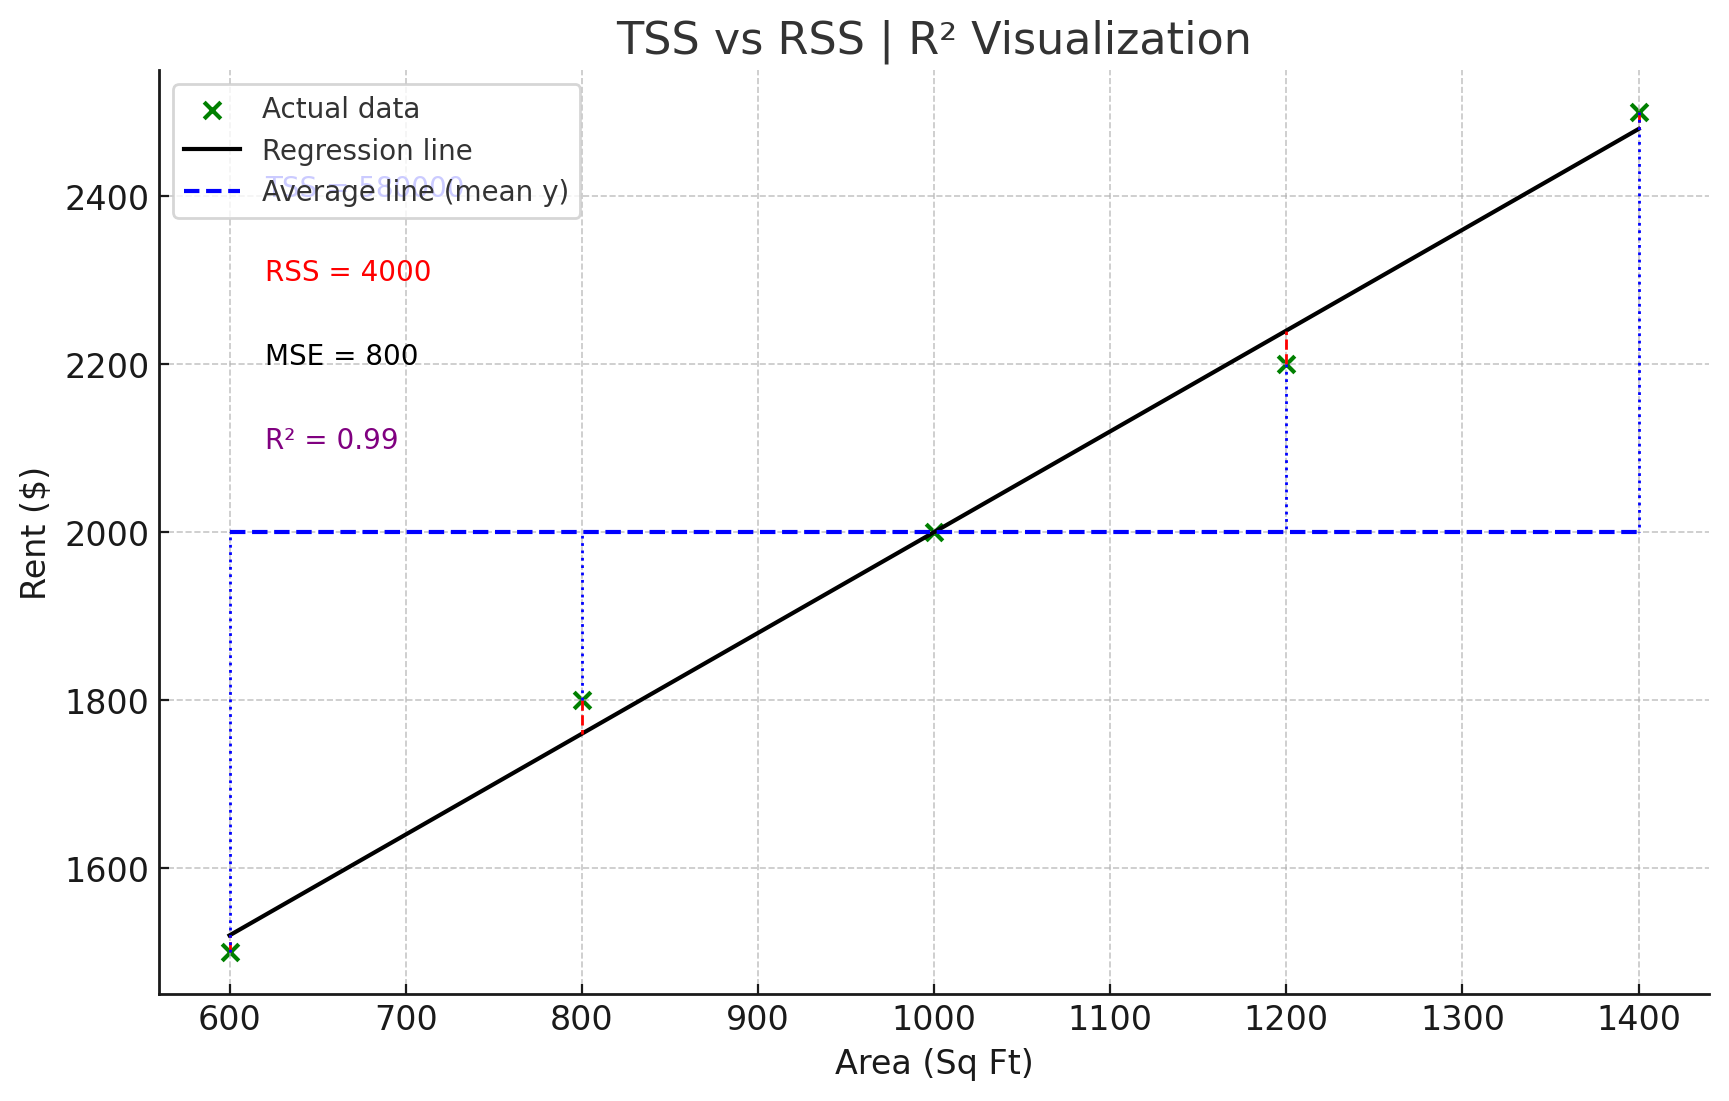